# GRIP : The Spark Foundation
# Data Science and Business Analytics Intern
# Task 1 : Prediction using Supervised ML
# Author : Adil Anwar
# Batch : Feb,2022

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.shape

(25, 2)

#### Graphical Analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

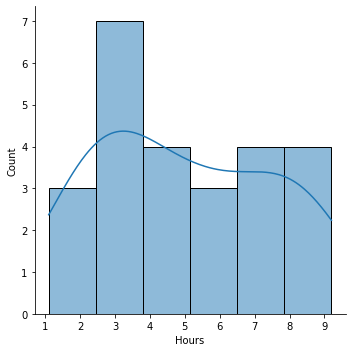

In [8]:
sns.displot(data=df,x="Hours",kde=True)

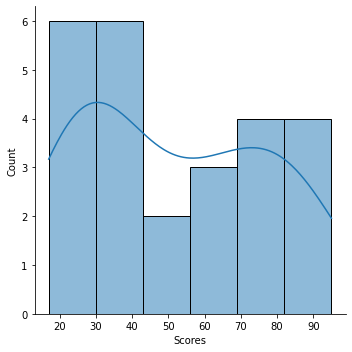

In [9]:
sns.displot(data=df,x="Scores",kde=True)

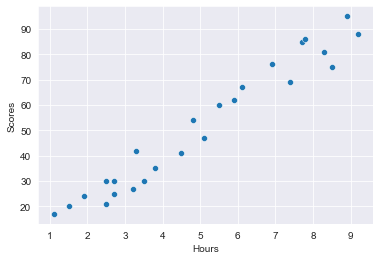

In [10]:
sns.set_style("darkgrid")
sns.scatterplot(x="Hours",y="Scores",data=df)
plt.show()

<AxesSubplot:>

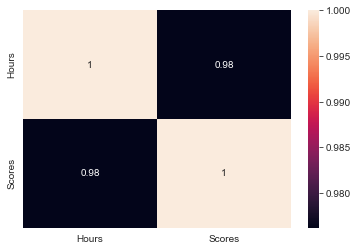

In [11]:
sns.heatmap(df.corr(),annot=True)

#### There is huge correlation between Dependent and Independent variable.
#### Both variables (Hours & Scores) are strongly associated with each other.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=df.iloc[:,:1]
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [14]:
y=df['Scores']
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

#### Splitting data in Train and Test

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [16]:
x_train

,Hours
22,3.8
17,1.9
24,7.8
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3
8,8.3
6,9.2


In [17]:
x_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [18]:
y_train

22    35
17    24
24    86
23    76
14    17
1     47
10    85
13    42
8     81
6     88
18    67
4     30
9     25
7     60
20    30
3     75
0     21
21    54
15    95
12    41
Name: Scores, dtype: int64

In [19]:
y_test

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

#### Linear Regression Model

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [21]:
lr=LinearRegression()

In [22]:
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(x_test)

#### Metrics

In [24]:
lr.score(x_train,y_train)

0.9515510725211552

In [25]:
lr.score(x_test,y_test)

0.9454906892105356

In [26]:
r2_score(y_test,y_pred)

0.9454906892105356

In [27]:
round(lr.predict([[9.25]])[0],0)

94.0

In [28]:
pd.DataFrame({"Actual":y_test,"Prediction":y_pred})

,Actual,Prediction
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [29]:
print("m = ",lr.coef_)
print("c = ",lr.intercept_)

m =  [9.91065648]
c =  2.018160041434683


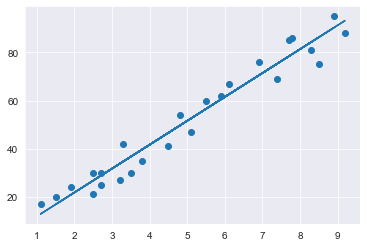

In [30]:
#line=mx+c
line=lr.coef_*X+lr.intercept_
plt.plot(X,line)
plt.scatter(X,y)

#### We will predict the Percentage Scores if a student studied for 9.25 Hours

In [31]:
hours=9.25
print("The number of Hours: {}".format(hours))
print("The percentage of student based on given hours of Study: {}".format(lr.predict([[hours]])[0]))

The number of Hours: 9.25
The percentage of student based on given hours of Study: 93.69173248737538


# Thankyou